<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Case Descriptions

## ROCOF based methods

0.4 pu load ramping on Bus 12 in Area 1

 - _Case 1_: No inertia emulation at all
 - _Case 2_: Power Sharing between areas (VSC 1 and 2 local inertia emulation enabled, VSC 2 dc droop enabled)
 - _Case 3_: WTG inertia response (VSC 1 inertia emulation, WTGs IE enabled)
 - _Case 4_: Area power sharing with WTG inertial response (VSC 1 and 2 inertia emulation enabled. Observe inadequate responses from WTGs)
 - _Case 5_: Adequate inertial response from WTGs (additional frequency information from grid areas)

Load Ramping in Area 1

In [1]:
with  open('case1.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm

ALTER, VSC1_IE2, REP, VSC 1, Ki, 0
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 0
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 0

ALTER, WTG4DC, REP, WTG4 1, Kdc, 0
ALTER, WTG4DC, REP, WTG4 2, Kdc, 0
""")

with  open('case2.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm

ALTER, VSC1_IE2, REP, VSC 1, Ki, -50
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 50
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 10

ALTER, WTG4DC, REP, WTG4 1, Kdc, 0
ALTER, WTG4DC, REP, WTG4 2, Kdc, 0
""")

with  open('case3.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm

ALTER, VSC1_IE2, REP, VSC 1, Ki, -50
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 0
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 0

ALTER, WTG4DC, REP, WTG4 1, Kdc, 10
ALTER, WTG4DC, REP, WTG4 2, Kdc, 10
""")

with  open('case4.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm


ALTER, VSC1_IE2, REP, VSC 1, Ki, -50
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 50
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 10

ALTER, WTG4DC, REP, WTG4 1, Kdc, 10
ALTER, WTG4DC, REP, WTG4 2, Kdc, 10
""")

In [2]:
%matplotlib inline

import os

from matplotlib import pyplot
import andes
from andes.main import run
from andes.plot import main as andesplot
from andes.plot import read_dat, read_label, do_plot, add_plot
import logging

andes.main.config_logger(log_file=None, stream_level=logging.DEBUG)

In [3]:
import cvxoptklu

Input format guessed as dome.
Parsing input file <case1.dm>
Parsing include file <ieee28.dm>
Imported model <vsc.VSC1_IE2>.
Imported model <windturbine.WTG4DC>.
Imported model <vsc.VSC>.
Imported model <wind.ConstWind>.
Parsing of include file <ieee28.dm> completed.
Case file case1.dm parsed in 0.0169 second.
-> Power flow study: NR method, non-flat start
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0106 second.
 Iter 1.  max mismatch = 1.4701436
 Iter 2.  max mismatch = 0.3985662
 Iter 3.  max mismatch = 0.0009131
 Iter 4.  max mismatch = 0.0000008
 Solution converged in 0.0242 second in 4 iterations
Dynamic models initialized in 0.0038 second.
report written to <case1_out.txt> in 0.0059 second.
-> Eigenvalue Analysis:
report saved.
System is small-signal stable in the initial neighbourhood.


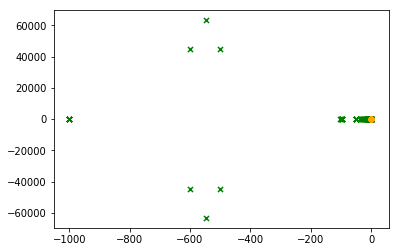

Eigenvalue analysis finished in 0.3313 second.
Input format guessed as dome.
Parsing input file <case2.dm>
Parsing include file <ieee28.dm>
Imported model <vsc.VSC1_IE2>.
Imported model <windturbine.WTG4DC>.
Imported model <vsc.VSC>.
Imported model <wind.ConstWind>.
Parsing of include file <ieee28.dm> completed.
Case file case2.dm parsed in 0.0135 second.
-> Power flow study: NR method, non-flat start
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0203 second.
 Iter 1.  max mismatch = 1.4701436
 Iter 2.  max mismatch = 0.3985662
 Iter 3.  max mismatch = 0.0009131
 Iter 4.  max mismatch = 0.0000008
 Solution converged in 0.0245 second in 4 iterations
Dynamic models initialized in 0.0066 second.
report written to <case2_out.txt> in 0.0052 second.
-> Eigenvalue Analysis:
report saved.
System is small-signal stable in the initial neighbourhood.


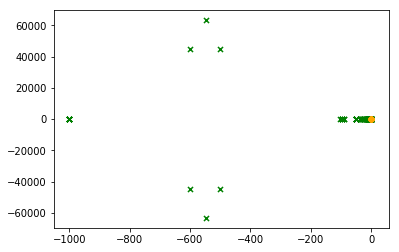

Eigenvalue analysis finished in 0.3270 second.
Input format guessed as dome.
Parsing input file <case3.dm>
Parsing include file <ieee28.dm>
Imported model <vsc.VSC1_IE2>.
Imported model <windturbine.WTG4DC>.
Imported model <vsc.VSC>.
Imported model <wind.ConstWind>.
Parsing of include file <ieee28.dm> completed.
Case file case3.dm parsed in 0.0165 second.
-> Power flow study: NR method, non-flat start
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0015 second.
 Iter 1.  max mismatch = 1.4701436
 Iter 2.  max mismatch = 0.3985662
 Iter 3.  max mismatch = 0.0009131
 Iter 4.  max mismatch = 0.0000008
 Solution converged in 0.0151 second in 4 iterations
Dynamic models initialized in 0.0233 second.
report written to <case3_out.txt> in 0.0130 second.
-> Eigenvalue Analysis:
report saved.
System is small-signal stable in the initial neighbourhood.


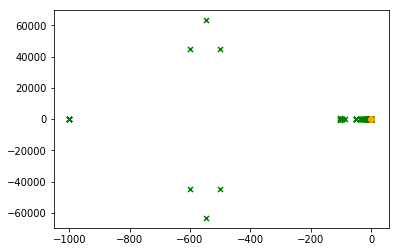

Eigenvalue analysis finished in 0.3585 second.
Input format guessed as dome.
Parsing input file <case4.dm>
Parsing include file <ieee28.dm>
Imported model <vsc.VSC1_IE2>.
Imported model <windturbine.WTG4DC>.
Imported model <vsc.VSC>.
Imported model <wind.ConstWind>.
Parsing of include file <ieee28.dm> completed.
Case file case4.dm parsed in 0.0176 second.
-> Power flow study: NR method, non-flat start
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0140 second.
 Iter 1.  max mismatch = 1.4701436
 Iter 2.  max mismatch = 0.3985662
 Iter 3.  max mismatch = 0.0009131
 Iter 4.  max mismatch = 0.0000008
 Solution converged in 0.0145 second in 4 iterations
Dynamic models initialized in 0.0049 second.
report written to <case4_out.txt> in 0.0044 second.
-> Eigenvalue Analysis:
report saved.
System is small-signal stable in the initial neighbourhood.


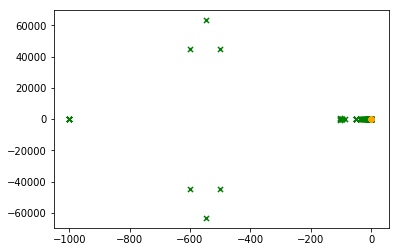

Eigenvalue analysis finished in 0.3052 second.
Input format guessed as dome.
Parsing input file <case1.dm>
Parsing include file <ieee28.dm>
Imported model <vsc.VSC1_IE2>.
Imported model <windturbine.WTG4DC>.
Imported model <vsc.VSC>.
Imported model <wind.ConstWind>.
Parsing of include file <ieee28.dm> completed.
Case file case1.dm parsed in 0.0100 second.
-> Power flow study: NR method, non-flat start
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0085 second.
 Iter 1.  max mismatch = 1.4701436
 Iter 2.  max mismatch = 0.3985662
 Iter 3.  max mismatch = 0.0009131
 Iter 4.  max mismatch = 0.0000008
 Solution converged in 0.0112 second in 4 iterations
Dynamic models initialized in 0.0035 second.
report written to <case1_out.txt> in 0.0052 second.
-> Time Domain Simulation: trapezoidal method, t=20 s
Load on Bus 12 ramped up by 0.4 pu at t = 2                    |ETA:  0:00:01] 
 [100%|############################

In [4]:
run(routine=['eig'], case='case1.dm', pert='load12_ramp.py')
run(routine=['eig'], case='case2.dm', pert='load12_ramp.py')
run(routine=['eig'], case='case3.dm', pert='load12_ramp.py')
run(routine=['eig'], case='case4.dm', pert='load12_ramp.py')

run(routine=['tds'], case='case1.dm', pert='load12_ramp.py')
run(routine=['tds'], case='case2.dm', pert='load12_ramp.py')
run(routine=['tds'], case='case3.dm', pert='load12_ramp.py')
run(routine=['tds'], case='case4.dm', pert='load12_ramp.py')